In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [60]:
train_df = pd.read_csv('/mnist/mnist_train.csv')
print("the shape of train data is :", train_df.shape)
train_df.head()

test_df = pd.read_csv('/mnist/mnist_test.csv')
print("the shape of test data is :", test_df.shape)
test_df.head()

the shape of train data is : (60000, 785)
the shape of test data is : (10000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


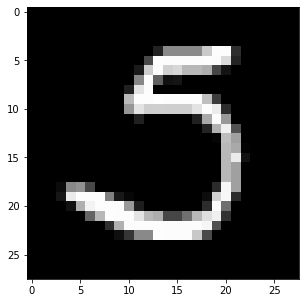

5


In [61]:
train_label = train_df['label']
train_df.drop('label', axis = 1, inplace = True)
ind = np.random.randint(0, 60000)
plt.figure(figsize = (20, 5))
grid_data = np.array(train_df.iloc[ind]).reshape(28,28)
plt.imshow(grid_data, interpolation = None, cmap = 'gray')
plt.show()
print(train_label[ind])

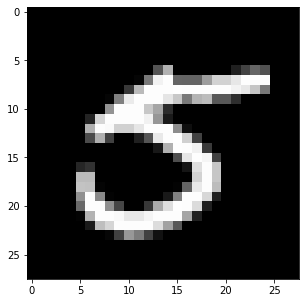

5


In [62]:
test_label = test_df['label']
test_df.drop('label', axis = 1, inplace = True)
ind = np.random.randint(0, 10000)
plt.figure(figsize = (20, 5))
grid_data = np.array(test_df.iloc[ind]).reshape(28,28)
plt.imshow(grid_data, interpolation = None, cmap = 'gray')
plt.show()
print(test_label[ind])

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_std_df = scaler.fit_transform(train_df)
print(train_std_df.shape)

test_std_df = scaler.fit_transform(test_df)
print(test_std_df.shape)

(60000, 784)
(10000, 784)


In [66]:
N_DIM = 5
pca = PCA(n_components=N_DIM)
train_pca = pca.fit_transform(train_std_df)

test_pca = pca.fit_transform(test_std_df)

In [67]:
print(train_pca.shape)
print(test_pca.shape)

(60000, 5)
(10000, 5)


In [68]:
print(train_pca)
print(test_pca)

[[-9.22140179e-01 -4.81479918e+00  6.79426218e-02 -8.05200295e+00
  -9.82569184e-01]
 [ 8.70898630e+00 -7.75440852e+00 -3.44791407e+00 -1.66656385e+00
   8.37396943e-01]
 [ 2.32831027e+00  9.43172694e+00 -6.18380223e+00  1.72102179e+00
   4.07878281e+00]
 ...
 [-3.77722036e+00 -3.23050294e+00 -3.80601066e+00 -7.50585791e+00
  -1.36433559e+00]
 [ 1.72239621e+00 -4.94826354e+00  6.92408801e-03  7.15139026e+00
  -9.21089269e-01]
 [-1.42723737e+00 -6.17542923e+00 -2.96763767e+00 -3.90354658e-01
   3.50213443e+00]]
[[-5.45830939  6.41402593 -4.19947077 -0.33218916  3.32282253]
 [ 2.80447491 -8.02886269 16.18585577  4.33456715  0.95263914]
 [-7.41124541 -3.86407116  1.08970412  3.92122852  6.18617995]
 ...
 [-5.00435958  1.15364863 -5.01705964  0.20261001 -4.49506457]
 [-1.42080336 -4.42328351 -7.00860573  2.2595203   4.65500824]
 [13.14265832 -4.26279999 -1.14560235 10.8001726  -8.3920792 ]]


In [69]:
train_df = pd.DataFrame(train_pca)
train_df.insert(0, 'label', train_label)
train_df.to_csv("train_pca.csv", index = False)
print(train_df)

test_df = pd.DataFrame(test_pca)
test_df.insert(0, 'label', test_label)
test_df.to_csv("test_pca.csv", index = False)
print(test_df)

       label         0         1         2         3         4
0          5 -0.922140 -4.814799  0.067943 -8.052003 -0.982569
1          0  8.708986 -7.754409 -3.447914 -1.666564  0.837397
2          4  2.328310  9.431727 -6.183802  1.721022  4.078783
3          1 -6.582178 -3.746275  3.690743 -0.460055  5.627339
4          9 -5.183246  3.133232 -6.278065  1.461174 -1.606975
...      ...       ...       ...       ...       ...       ...
59995      8 -2.039353 -5.119057  0.375432 -4.688763 -0.647513
59996      3  0.607838 -6.498412  3.507284 -8.396345 -1.008815
59997      5 -3.777220 -3.230503 -3.806011 -7.505858 -1.364336
59998      6  1.722396 -4.948264  0.006924  7.151390 -0.921089
59999      8 -1.427237 -6.175429 -2.967638 -0.390355  3.502134

[60000 rows x 6 columns]
      label          0         1          2          3         4
0         7  -5.458309  6.414026  -4.199471  -0.332189  3.322823
1         2   2.804475 -8.028863  16.185856   4.334567  0.952639
2         1  -7.411245 